In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_rows', None)


import warnings
warnings.filterwarnings('ignore')

# Step 1. Aggregate the datasets
# Iterrate each file in the directory
files = [file for file in os.listdir('./Data')]
for file in files:
    print(file)

# Concatinate the file names in the dataframe
all_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Data/' + file)
    all_data = pd.concat([all_data, df])

all_data.head()

# Make it into a new csv file
all_data.to_csv('all_data2.csv', index=False)

# Step 2 Clean the data (Remove NA datas)
all_data = all_data.dropna(how='all')
all_data.head()


In [ ]:
# Step 3 Check the datatype
all_data.dtypes

# Check the dtatset to see if any of the observations consist of the specific string
# extracts rows where the 'Order ID' column starts with the string "Or" (the first two characters of the 'Order ID' column).
mp_df = all_data[all_data['Order ID'].str[0:2] == 'Or']
mp_df.head()



In [ ]:
# Remove invalid rows
all_data = all_data[all_data['Order ID'].str[0:2] != 'Or']
all_data.head()

In [ ]:
# Step 4 Convert to appropriate data types
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

all_data.head()

In [ ]:
# Recheck datatype see if it's appropriate
all_data.dtypes

# Q1.What was the best month for sales. How much was earned ?

In [ ]:
# Add a month column
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()


In [ ]:
# Add a city column
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()



In [ ]:
# Add new column for sales
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')
all_data.head()

In [29]:
# Q1.What was the best month for sales. How much was earned ?
all_data.groupby(['Month']).sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


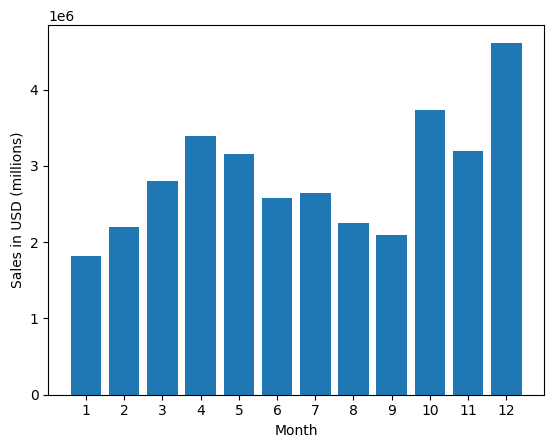

In [30]:
# Visualize the Q1's answer
months = range(1,13)
plt.bar(months, all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD (millions)')
plt.xlabel('Month')
plt.show()

# Q2 Which city sold the most product

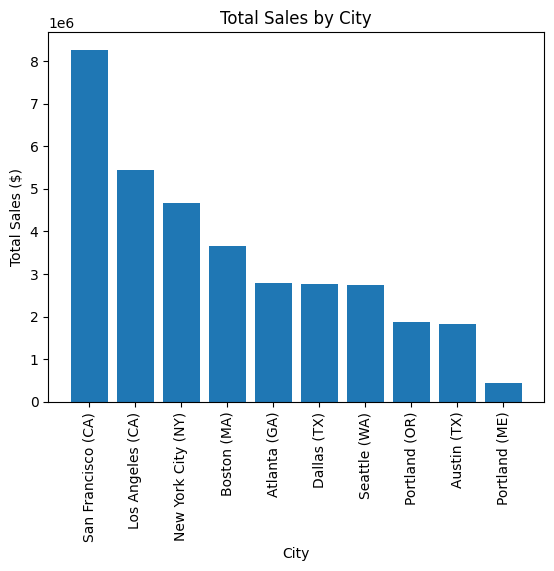

In [34]:
# Q2 Which city sold the most product

# Group the data by city and sum the sales
city_sales = all_data.groupby('City')['Sales'].sum()

# Sort the cities in descending order based on total sales
sorted_cities = city_sales.sort_values(ascending=False)

# Visualize the Q2's answer
# Create a bar chart of the total sales for each city
plt.bar(sorted_cities.index, sorted_cities.values)

# Add labels and title
plt.xlabel('City')
plt.ylabel('Total Sales ($)')
plt.title('Total Sales by City')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)
plt.show()

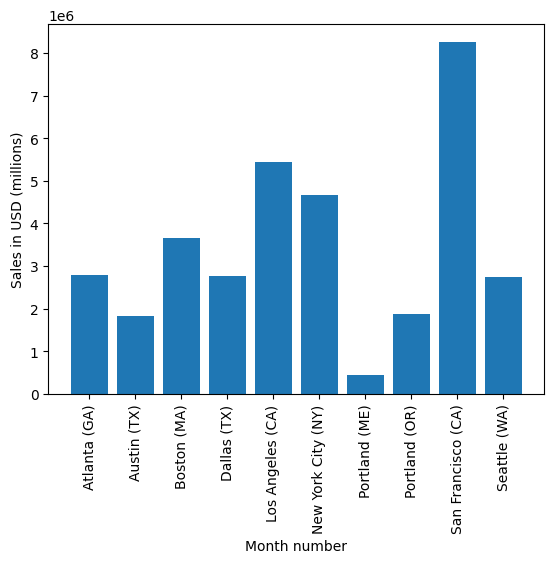

In [43]:
# Q2 Sample Answer 2
all_data.groupby(['City']).sum()
cities = [city for city, df in all_data.groupby(['City'])]

plt.bar(cities, all_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD (millions)')
plt.xlabel('Month number')
plt.xticks(cities, rotation=90)
plt.show()

# Q3: Which product sold the most ? Why do you think it sold the most ?

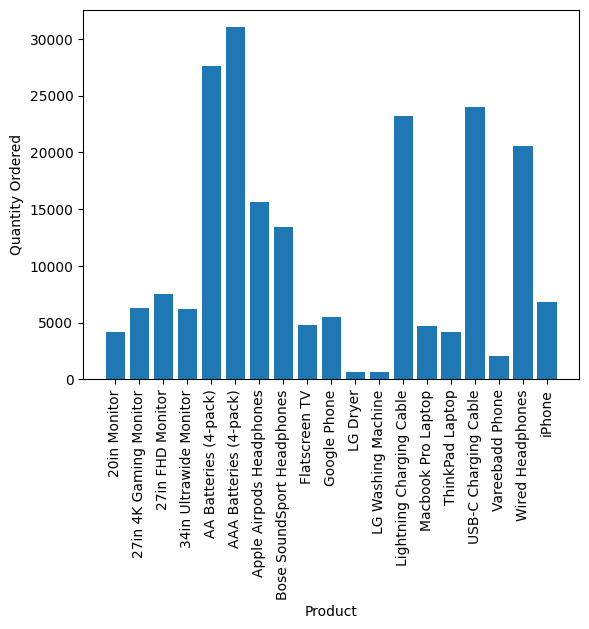

In [39]:
# Q3: Which product sold the most ? Why do you think it sold the most ?
product_sales = all_data.groupby('Product')['Quantity Ordered'].sum()

# Plot a bar graph of the total quantity ordered for each product
plt.bar(product_sales.index, product_sales)
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.show()


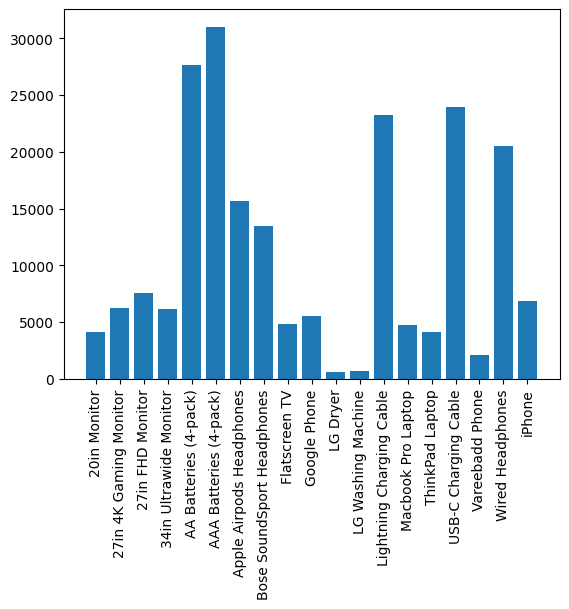

In [42]:
# Q3 Sample Answer 2
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

prod = [product for product, df in product_group]
plt.bar(prod, quantity_ordered)
plt.xticks(prod, rotation = 'vertical', size=8)
plt.show()

[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

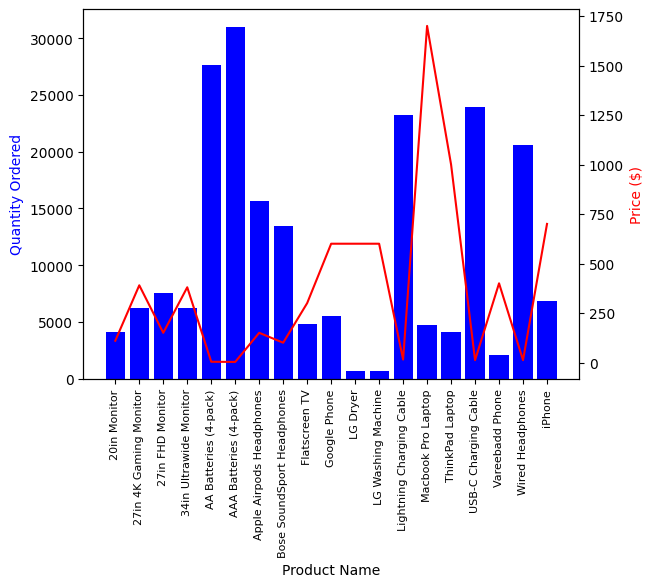

In [44]:
# Stack plot onto the existing plot in Q3 Sample Answer 2
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(prod, quantity_ordered, color='b')
ax2.plot(prod, prices, color='r')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='b')
ax2.set_ylabel('Price ($)', color = 'r')
ax1.set_xticklabels(prod, rotation='vertical', size=8)

# Q4: What time should we display advertisements to maximize likelihood of customer's buying product ?

In [45]:
# Add additional time columns
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,9,27,1


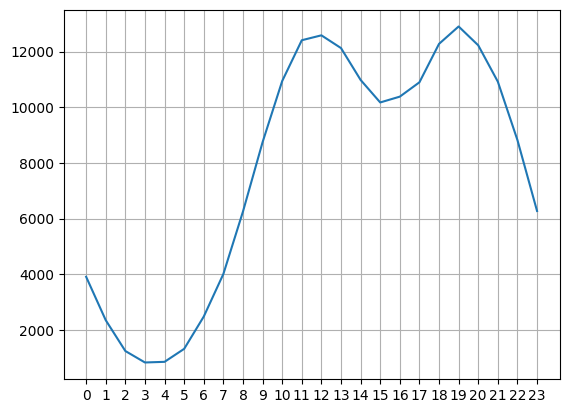

In [59]:
hours = [pair for pair, df in all_data.groupby(['Hour'])]
plt.plot(hours, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(hours)
plt.grid()
plt.show()

# Q5: What Products are often sold together

In [47]:
# get the items ordered as part of the same order ID
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38,1
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,19,42,1
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles (CA),11.95,19,42,1
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,Boston (MA),99.99,11,31,1


In [48]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count,Grouped
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38,1,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38,1,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,19,42,1,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles (CA),11.95,19,42,1,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,Boston (MA),99.99,11,31,1,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [53]:
df2 = df[['Order ID', 'Grouped']].drop_duplicates()
df2.head(50)

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [58]:
from itertools import combinations
from collections import Counter
count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    # Look for no. of combinations ie: 3
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
